# Project: Write a Data Science Blog Post

## 1. Business Understanding

Each year Stack Overflow field a survey covering everything from developers' favorite technologies to their job preference. As a woman and a recent graduate, I was interested in women's current status as a developer and what is the desired features to developers. For this project, I was interested in using Stack Overflow data from 2019 to better understand:

  1. What is the age distribution of a developer for each gender?
    * Variables: `Age` and `Gender`


  2. What is the salary difference between the two genders?
    * Based on the length of professional experience
    * Based on the level of education
    * Variables: `ConvertedComp`, `Gender`, `YearsCodePro`, and `EdLevel`
    
  
  3. What are the languages that are expected to be used in 2020?
    * Variable: `LanguageDesireNextYear`
    * The same method can be applied to `DatabaseDesireNextYear`, `PlatformDesireNextYear`, and `WebFrameDesireNextYearplatforms`


For simplicity, I focused on fully-employed developers' survey results from the top 20 countries.

## 2. Data Understanding

In [1]:
import re
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Printing options (optional)
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_colwidth', -1)
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [2]:
# Load survey results and schema datasets
df = pd.read_csv('./developer_survey_2019/survey_results_public.csv')
df_schema = pd.read_csv('./developer_survey_2019/survey_results_schema.csv')

In [3]:
# Check the structure of the data
display(df.shape)
display(df.columns)
display(df.isnull().sum())

(88883, 85)

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

Respondent      0    
MainBranch      552  
Hobbyist        0    
OpenSourcer     0    
OpenSource      2041 
                ...  
Sexuality       12736
Ethnicity       12215
Dependents      5824 
SurveyLength    1899 
SurveyEase      1802 
Length: 85, dtype: int64

In [4]:
display(df_schema.shape) 
display(df_schema.head())

(85, 2)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?


## 3. Prepare Data

For simplicity, I am going to look for data of fully-employed developers' survey results from the top 20 countries. So from _section 3.1 to 3.4_, I will check columns which have the information about _country, position (or main branch of respondents), employment status, and the gender_.

In addtion to the four criteria or filters above, I need the following variables to answer the three questions defined in the beginning of this notebook:
  * Q1: `Age` and `Gender`
  * Q2: `ConvertedComp`, `Gender`, `YearsCodePro`, and `EdLevel`
  * Q3: `LanguageDesireNextYear` (`DatabaseDesireNextYear`, `PlatformDesireNextYear`, and `WebFrameDesireNextYearplatforms` are optional)

For the last question, missing values are acceptable as it will sum up all available survey results to get some insights. However, for the first and the second questions, which finds the direct relationship between two values, records with missing values are unacceptable. Therefore, I will check missing values in the following rows and drop corresponding records: `ConvertedComp`, `Age`, `YearsCodePro`, `EdLevel`

### 3.1. Country

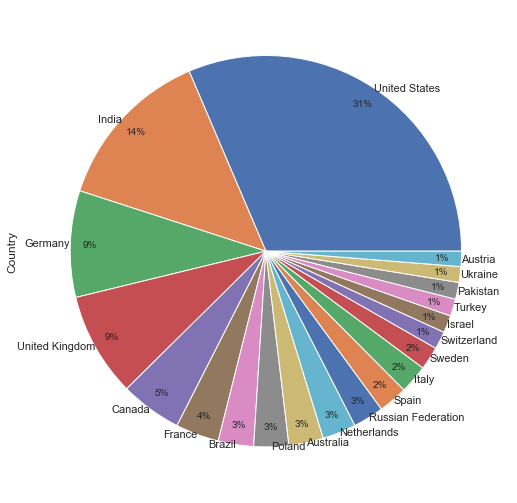

In [5]:
plt.figure(figsize = (16, 9))
df.Country.value_counts()[:20].plot.pie(autopct='%1.0f%%', pctdistance=0.9, labeldistance=1.0)
plt.show()

In [6]:
country_list = df.Country.value_counts()[:20].index.tolist()
print(country_list)

['United States', 'India', 'Germany', 'United Kingdom', 'Canada', 'France', 'Brazil', 'Poland', 'Australia', 'Netherlands', 'Russian Federation', 'Spain', 'Italy', 'Sweden', 'Switzerland', 'Israel', 'Turkey', 'Pakistan', 'Ukraine', 'Austria']


### 3.2. MainBranch

In [7]:
display(df.MainBranch.value_counts())

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work    7539 
I code primarily as a hobby                                                      3340 
I used to be a developer by profession, but no longer am                         1584 
Name: MainBranch, dtype: int64

In [8]:
MainBranch = {'I am a developer by profession': 'Developer', 
              'I am a student who is learning to code': 'Student', 
              'I am not primarily a developer, but I write code sometimes as part of my work': 'Semi_Developer', 
              'I code primarily as a hobby': 'Hobbist', 
              'I used to be a developer by profession, but no longer am': 'Ex_Developer'}

df['MainBranch'].replace(MainBranch, inplace = True) 

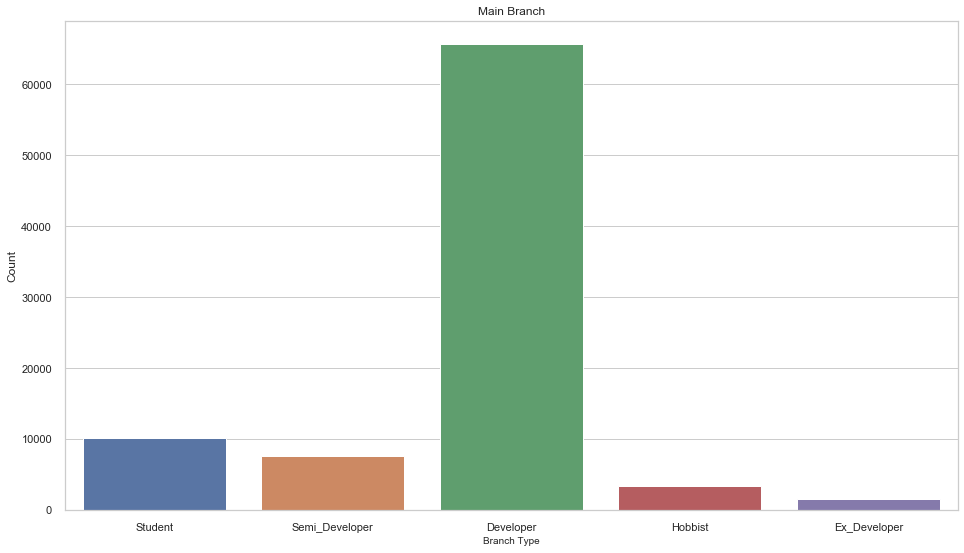

In [9]:
plt.figure(figsize = (16, 9))
sns.countplot(x = df.MainBranch.dropna())
plt.xlabel('Branch Type', fontsize=10)
plt.ylabel('Count')
plt.title('Main Branch')
plt.show()

### 3.3. Employment

In [10]:
display(df.Employment.value_counts())

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed    8511 
Not employed, but looking for work                      5600 
Employed part-time                                      4469 
Not employed, and not looking for work                  3803 
Retired                                                 358  
Name: Employment, dtype: int64

In [11]:
Employment = {'Employed full-time': 'Full_Time', 
              'Independent contractor, freelancer, or self-employed': 'Self_Employed', 
              'Not employed, but looking for work': 'Not_Employed_Seeking', 
              'Employed part-time': 'Part_Time', 
              'Not employed, and not looking for work': 'Not_Employed_Not_Seeking', 
              'Retired': 'Retired'}

df['Employment'].replace(Employment, inplace = True) 


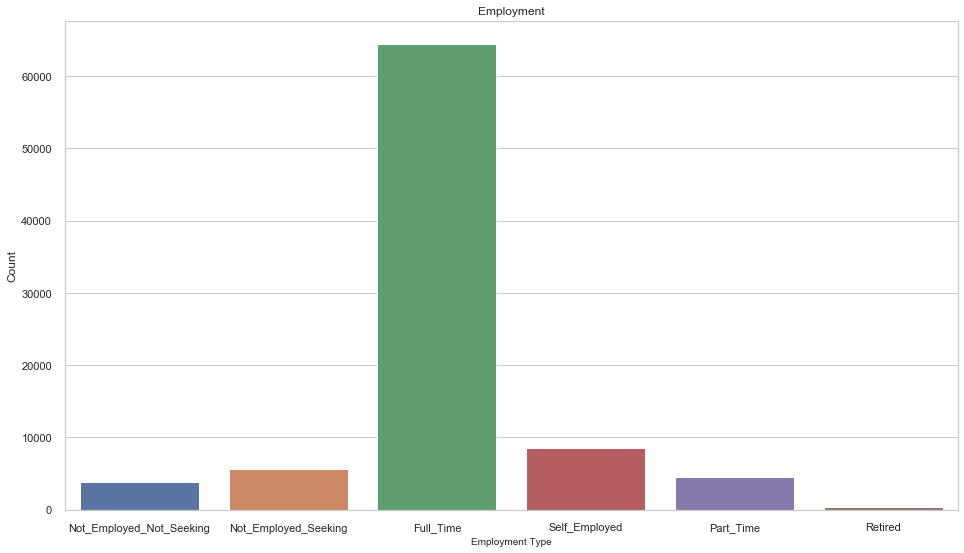

In [12]:
plt.figure(figsize = (16, 9))
sns.countplot(x = df.Employment.dropna())
plt.xlabel('Employment Type', fontsize=10)
plt.ylabel('Count')
plt.title('Employment')
plt.show()

### 3.4. Gender

In [13]:
display(df.Gender.value_counts())

Man                                                            77919
Woman                                                          6344 
Non-binary, genderqueer, or gender non-conforming              597  
Man;Non-binary, genderqueer, or gender non-conforming          181  
Woman;Non-binary, genderqueer, or gender non-conforming        163  
Woman;Man                                                      132  
Woman;Man;Non-binary, genderqueer, or gender non-conforming    70   
Name: Gender, dtype: int64

### 3.5. Filtering and Dealing with Missing Values

In [14]:
# Filter the data using the four criteria and the name of columns needed to answer questions
col_list = ['MainBranch', 'Country', 'Employment', 'Gender', 'Age', 
            'ConvertedComp', 'YearsCodePro', 'EdLevel',
            'LanguageDesireNextYear', 'DatabaseDesireNextYear', 'PlatformDesireNextYear', 'WebFrameDesireNextYear'] 
# 'DevType', 'YearsCode', 'WorkWeekHrs', 'EduOther', 'CareerSat', 'JobSat', 'JobFactors', 'WorkLoc', 'WorkRemote', 
# 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith', 

df = df.loc[df.Country.isin(country_list) & (df.MainBranch == 'Developer') & \
            (df.Employment == 'Full_Time') & df.Gender.isin(['Man', 'Woman']), col_list]

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41101 entries, 3 to 88329
Data columns (total 12 columns):
MainBranch                41101 non-null object
Country                   41101 non-null object
Employment                41101 non-null object
Gender                    41101 non-null object
Age                       38360 non-null float64
ConvertedComp             33928 non-null float64
YearsCodePro              40942 non-null object
EdLevel                   40458 non-null object
LanguageDesireNextYear    39248 non-null object
DatabaseDesireNextYear    32937 non-null object
PlatformDesireNextYear    36519 non-null object
WebFrameDesireNextYear    30402 non-null object
dtypes: float64(2), object(10)
memory usage: 4.1+ MB


None

In [15]:
# Before removing records with missing values, check the portion of missing values in each column
display( (df.isnull().sum() / df.shape[0]).sort_values() )

MainBranch                0.000000
Country                   0.000000
Employment                0.000000
Gender                    0.000000
YearsCodePro              0.003869
EdLevel                   0.015644
LanguageDesireNextYear    0.045084
Age                       0.066689
PlatformDesireNextYear    0.111481
ConvertedComp             0.174521
DatabaseDesireNextYear    0.198633
WebFrameDesireNextYear    0.260310
dtype: float64

In [16]:
# Drop rows with missing values in 'ConvertedComp', 'Age', 'YearsCodePro', and 'EdLevel' columns 
# Note that only LanguageDesireNextYear, DatabaseDesireNextYear, PlatformDesireNextYear, and 
# WebFrameDesireNextYearplatforms can have missing values
df.dropna(subset = ['ConvertedComp', 'Age', 'YearsCodePro', 'EdLevel'], axis = 0, inplace = True)
display( (df.isnull().sum() / df.shape[0]).sort_values() )

MainBranch                0.000000
Country                   0.000000
Employment                0.000000
Gender                    0.000000
Age                       0.000000
ConvertedComp             0.000000
YearsCodePro              0.000000
EdLevel                   0.000000
LanguageDesireNextYear    0.039136
PlatformDesireNextYear    0.105703
DatabaseDesireNextYear    0.196018
WebFrameDesireNextYear    0.254815
dtype: float64

## 4. Data Modeling

### Q1. What is the age distribution of a developer for each gender?
  * Variables: `Age` and `Gender`

In [17]:
age_gender = df[['Age', 'Gender']]
age_gender = age_gender.astype({'Age': int})
print(np.unique(age_gender.Age).tolist())
print(age_gender.Gender.value_counts())

[1, 2, 4, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 98, 99]
Man      30029
Woman    2269 
Name: Gender, dtype: int64


In [18]:
age_gender = age_gender[(age_gender.Age >= 10) & (age_gender.Age <=70)]

man = age_gender[age_gender['Gender'] == 'Man'].groupby('Age').agg('count').rename(columns={'Gender':'Man'})
woman = age_gender[age_gender['Gender'] == 'Woman'].groupby('Age').agg('count').rename(columns={'Gender':'Woman'})

age_gender_agg = pd.concat([man, woman], axis = 1).reset_index()
age_gender_agg.fillna(0, inplace = True)
age_gender_agg['Man_ratio'] = age_gender_agg.Man / age_gender_agg.Man.sum()
age_gender_agg['Woman_ratio'] = age_gender_agg.Woman / age_gender_agg.Woman.sum()
display(age_gender_agg.head(10))

,Age,Man,Woman,Man_ratio,Woman_ratio
0,13,0.0,1.0,0.000000,0.000441
1,16,4.0,1.0,0.000133,0.000441
2,17,14.0,1.0,0.000466,0.000441
3,18,67.0,3.0,0.002232,0.001322
4,19,108.0,6.0,0.003599,0.002644
5,20,224.0,16.0,0.007464,0.007052
6,21,448.0,33.0,0.014927,0.014544
7,22,961.0,76.0,0.032021,0.033495
8,23,1415.0,136.0,0.047148,0.059938
9,24,1742.0,154.0,0.058043,0.067871


In [19]:
average_man = np.sum(age_gender_agg.Age * age_gender_agg.Man) / age_gender_agg.Man.sum(skipna = True)
average_woman = np.sum(age_gender_agg.Age * age_gender_agg.Woman) / age_gender_agg.Woman.sum(skipna = True)

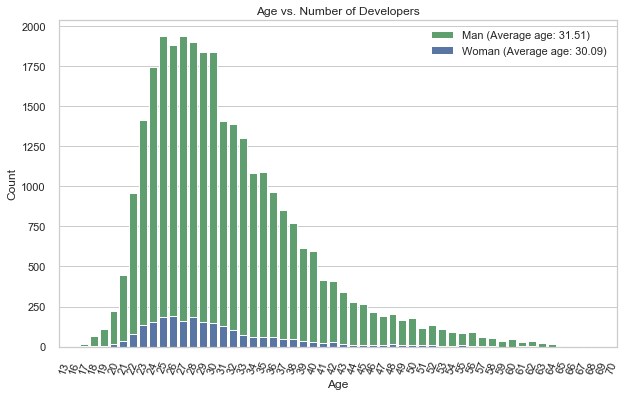

In [20]:
plt.figure(figsize = (10, 6))
sns.barplot(x = age_gender_agg.Age, y = age_gender_agg.Man, color = 'g', 
            label = 'Man (Average age: {0:.2f})'.format(average_man))
sns.barplot(x = age_gender_agg.Age, y = age_gender_agg.Woman, color = 'b', 
            label = 'Woman (Average age: {0:.2f})'.format(average_woman))
plt.xlabel('Age')
plt.xticks(rotation = 70)
plt.ylabel('Count')
plt.title('Age vs. Number of Developers')
plt.legend()
plt.show()

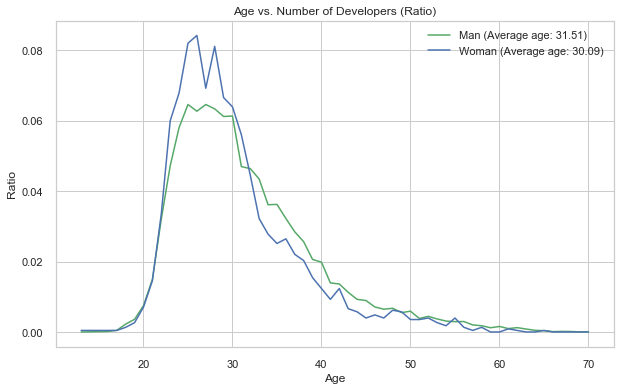

In [21]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = age_gender_agg.Age, y = age_gender_agg.Man_ratio, color = 'g', 
             label = 'Man (Average age: {0:.2f})'.format(average_man))
sns.lineplot(x = age_gender_agg.Age, y = age_gender_agg.Woman_ratio, color = 'b', 
             label = 'Woman (Average age: {0:.2f})'.format(average_woman))
plt.xlabel('Age')
plt.ylabel('Ratio')
plt.title('Age vs. Number of Developers (Ratio)')
plt.show()

In [22]:
age_gender_agg[(age_gender_agg.Age >= 20) & (age_gender_agg.Age <= 30)].apply(sum)

Age            275.000000  
Man            16124.000000
Woman          1429.000000 
Man_ratio      0.537252    
Woman_ratio    0.629793    
dtype: float64

### Q2. What is the salary difference between the two genders?
  * Based on the length of professional experience
  * Based on the level of education
  * Variables: `ConvertedComp`, `Gender`, `YearsCodePro`, and `EdLevel`

In [23]:
display(df.YearsCodePro.value_counts())

3                     3419
2                     3235
5                     2969
4                     2883
6                     2105
                      ... 
More than 50 years    3   
45                    2   
49                    1   
50                    1   
47                    1   
Name: YearsCodePro, Length: 51, dtype: int64

In [24]:
display(df.YearsCodePro.value_counts().index)

Index(['3', '2', '5', '4', '6', '10', '7', '1', '8', 'Less than 1 year', '12',
       '9', '15', '11', '20', '13', '18', '14', '19', '16', '22', '17', '21',
       '25', '23', '30', '24', '28', '35', '27', '26', '32', '33', '29', '31',
       '40', '34', '36', '38', '37', '39', '41', '42', '43', '44', '48',
       'More than 50 years', '45', '49', '50', '47'],
      dtype='object')

In [25]:
df.YearsCodePro.replace(['Less than 1 year', 'More than 50 years'], [0.5, 51], inplace = True)
df = df.astype({'YearsCodePro': float}) # 'YearsCode': float, 

In [26]:
q2_YearsCodePro = df[df.YearsCodePro <= 30].groupby(['YearsCodePro', 'Gender'])['ConvertedComp'].agg(['count', 'mean']).reset_index()
display(q2_YearsCodePro.head())


,YearsCodePro,Gender,count,mean
0,0.5,Man,1074,111130.871508
1,0.5,Woman,197,127621.720812
2,1.0,Man,1474,116585.706920
3,1.0,Woman,185,104790.691892
4,2.0,Man,2898,119952.764665


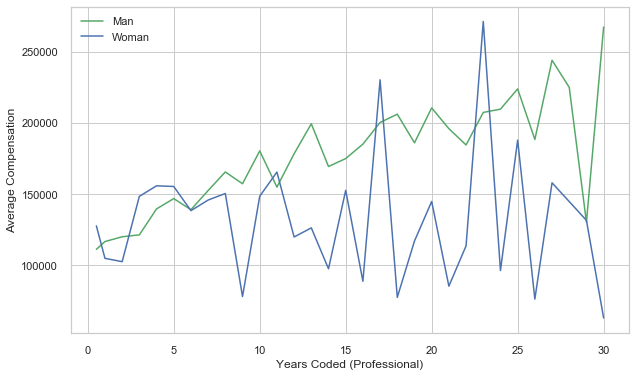

In [27]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = q2_YearsCodePro.YearsCodePro, 
             y = q2_YearsCodePro[q2_YearsCodePro.Gender == 'Man']['mean'], color = 'g', label = 'Man')
sns.lineplot(x = q2_YearsCodePro.YearsCodePro, 
             y = q2_YearsCodePro[q2_YearsCodePro.Gender == 'Woman']['mean'], color = 'b', label = 'Woman')
plt.xlabel('Years Coded (Professional)')
plt.ylabel('Average Compensation')
plt.show()

In [28]:
display(df.EdLevel.value_counts())

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              16917
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           7965 
Some college/university study without earning a degree                                3461 
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    1393 
Associate degree                                                                      1174 
Other doctoral degree (Ph.D, Ed.D., etc.)                                             801  
Professional degree (JD, MD, etc.)                                                    370  
I never completed any formal education                                                110  
Primary/elementary school                                                             107  
Name: EdLevel, dtype: int64

In [29]:
EdLevel = {'Bachelor’s degree (BA, BS, B.Eng., etc.)': '6_Bachelor’s degree', 
           'Master’s degree (MA, MS, M.Eng., MBA, etc.)': '7_Master’s degree', 
           'Some college/university study without earning a degree': '4_College (Non-degree)', 
           'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': '3_Secondary school', 
           'Associate degree': '5_Associate degree', 
           'Other doctoral degree (Ph.D, Ed.D., etc.)': '9_Doctoral degree', 
           'Professional degree (JD, MD, etc.)': '8_Professional degree', 
           'I never completed any formal education': '1_None', 
           'Primary/elementary school': '2_Primary school'}

df['EdLevel'].replace(EdLevel, inplace = True) 

In [30]:
display(df.EdLevel.value_counts())

6_Bachelor’s degree       16917
7_Master’s degree         7965 
4_College (Non-degree)    3461 
3_Secondary school        1393 
5_Associate degree        1174 
9_Doctoral degree         801  
8_Professional degree     370  
1_None                    110  
2_Primary school          107  
Name: EdLevel, dtype: int64

In [31]:
q2_EdLevel = df.groupby(['EdLevel', 'Gender'])['ConvertedComp'].agg(['count', 'mean']).reset_index()
display(q2_EdLevel.head())

,EdLevel,Gender,count,mean
0,1_None,Man,105,162303.333333
1,1_None,Woman,5,83019.600000
2,2_Primary school,Man,105,142068.295238
3,2_Primary school,Woman,2,435000.000000
4,3_Secondary school,Man,1349,108979.538176


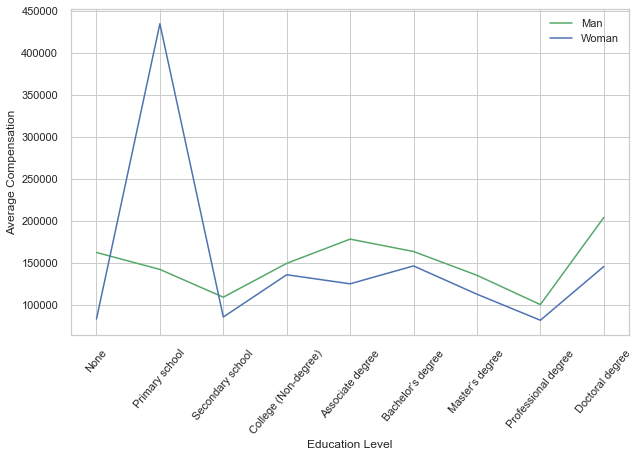

In [32]:
plt.figure(figsize = (10, 6))
# ax = q2_EdLevel[q2_EdLevel.Gender == 'Man'].sort_values("mean").plot(x = 'EdLevel', y = 'mean', color = 'b')
# q2_EdLevel[q2_EdLevel.Gender == 'Woman'].plot(x = 'EdLevel', y = 'mean', ax = ax, color = 'g') 
# , ['EdLevel', 'mean']

sns.lineplot(x = q2_EdLevel.EdLevel, 
             y = q2_EdLevel[q2_EdLevel.Gender == 'Man']['mean'], color = 'g', label = 'Man')
sns.lineplot(x = q2_EdLevel.EdLevel, 
             y = q2_EdLevel[q2_EdLevel.Gender == 'Woman']['mean'], color = 'b', label = 'Woman')
plt.xlabel('Education Level')
plt.xticks(np.arange(9), ('None', 'Primary school', 'Secondary school', 'College (Non-degree)', 
                          'Associate degree', 'Bachelor’s degree', 'Master’s degree', 'Professional degree', 
                          'Doctoral degree'), rotation = 50)
plt.ylabel('Average Compensation')
plt.show()

In [33]:
df[(df.Gender == 'Woman') & (df.EdLevel == '2_Primary school')]

,MainBranch,Country,Employment,Gender,Age,ConvertedComp,YearsCodePro,EdLevel,LanguageDesireNextYear,DatabaseDesireNextYear,PlatformDesireNextYear,WebFrameDesireNextYear
38152,Developer,United States,Full_Time,Woman,21.0,720000.0,4.0,2_Primary school,Rust;Other(s):,PostgreSQL,NaN,NaN
78717,Developer,United States,Full_Time,Woman,23.0,150000.0,2.0,2_Primary school,C++;C#;HTML/CSS;JavaScript;Rust;TypeScript;Other(s):,SQLite,Windows,React.js


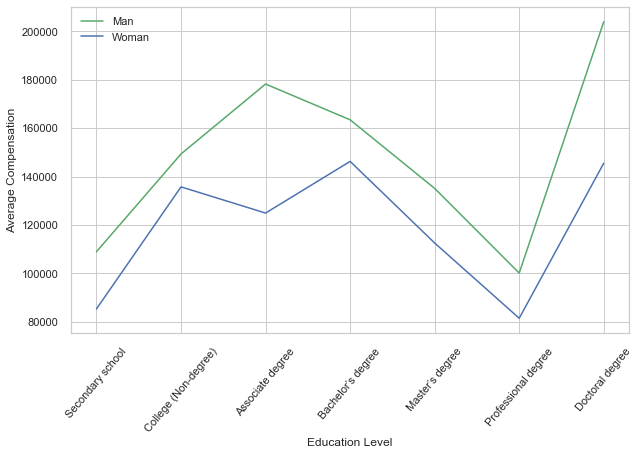

In [34]:
q2_EdLevel_2 = q2_EdLevel[~q2_EdLevel.EdLevel.isin(['1_None', '2_Primary school'])]

plt.figure(figsize = (10, 6))
sns.lineplot(x = q2_EdLevel_2.EdLevel, 
             y = q2_EdLevel_2[q2_EdLevel_2.Gender == 'Man']['mean'], color = 'g', label = 'Man')
sns.lineplot(x = q2_EdLevel_2.EdLevel, 
             y = q2_EdLevel_2[q2_EdLevel_2.Gender == 'Woman']['mean'], color = 'b', label = 'Woman')
plt.xlabel('Education Level')
plt.xticks(np.arange(7), ('Secondary school', 'College (Non-degree)', 
                          'Associate degree', 'Bachelor’s degree', 'Master’s degree', 'Professional degree', 
                          'Doctoral degree'), rotation = 50)
plt.ylabel('Average Compensation')
plt.show()

### Q3. What are the languages that are expected to be used in 2020?
  * Variable: `LanguageDesireNextYear`
  * The same method can be applied to `DatabaseDesireNextYear`, `PlatformDesireNextYear`, and `WebFrameDesireNextYearplatforms`

In [35]:
multiple_choice = ['LanguageDesireNextYear', 'DatabaseDesireNextYear', 
                   'PlatformDesireNextYear', 'WebFrameDesireNextYear']

for column in df[multiple_choice].columns:
    temp = df[column].str.split(pat = ';', expand = True).stack()
    display(temp.unique())

array(['C', 'C#', 'JavaScript', 'SQL', 'Bash/Shell/PowerShell',
       'HTML/CSS', 'Rust', 'TypeScript', 'WebAssembly', 'C++',
       'Other(s):', 'Java', 'Python', 'Ruby', 'Go', 'Kotlin',
       'Objective-C', 'Swift', 'Clojure', 'R', 'F#', 'PHP', 'Elixir',
       'Scala', 'Assembly', 'Erlang', 'Dart', 'VBA'], dtype=object)

array(['MySQL', 'SQLite', 'Firebase', 'Redis', 'Elasticsearch', 'MongoDB',
       'Microsoft SQL Server', 'PostgreSQL', 'DynamoDB', 'Oracle',
       'Couchbase', 'Other(s):', 'MariaDB', 'Cassandra'], dtype=object)

array(['Linux', 'Windows', 'Android', 'AWS', 'Docker',
       'IBM Cloud or Watson', 'Slack', 'WordPress',
       'Google Cloud Platform', 'Microsoft Azure', 'Raspberry Pi', 'iOS',
       'MacOS', 'Kubernetes', 'Heroku', 'Arduino', 'Other(s):'],
      dtype=object)

array(['Express', 'Vue.js', 'Angular/Angular.js', 'ASP.NET', 'React.js',
       'Spring', 'Ruby on Rails', 'Flask', 'Other(s):', 'jQuery',
       'Laravel', 'Django', 'Drupal'], dtype=object)

In [36]:
def expand_multiple_choices(df, column):
    ''' expand conbined values to separate columns
    Args:
    df: dataframe; a dataframe which has columns with multiple values combined
    column; list; a list of column names

    Returns:
    new_colname_list: list; a list of new columns' names which the format is 
                      {original column name}_{unique value in the column}
    new_columns: dataframe; a dataframe which columns are from new_colname_list
    '''
    
    # Save original column
    target = df[column]
    # Simplify the original column's values and store it into the original dataset
    target_expaneded = target.str.split(pat = ';', expand = True).stack() # .replace(new_values)
    unique_values = target_expaneded.unique()
    print(unique_values)
    target_expaneded = target_expaneded.unstack().apply(lambda x: ';'.join(x.dropna().astype(str)), axis = 1)

    # Create new column names and corresponding columns
    new_colname_list = []
    new_columns = {}
    for value in unique_values:
        # Create new column names and add it to a list
        col_name = '{}_{}'.format(column, value)
        new_colname_list.append(col_name)

        # If a row has a unique value in the string, return 1 (true) or 0 (false) and have it into a dictionary
        result = pd.Series(target_expaneded.transform(lambda x: int(value.casefold() in str(x).casefold() )), \
                           index = target_expaneded.index)
        new_columns[col_name] = result
    
    # Transform the dictionary of new column names and corresponding values into a dataframe
    new_columns = pd.DataFrame(new_columns)

    return new_colname_list, new_columns


In [37]:
multiple_choice = ['LanguageDesireNextYear', 'PlatformDesireNextYear', 
                   'DatabaseDesireNextYear', 'WebFrameDesireNextYear'] 

for column in multiple_choice:
    print(column)
    new_colname_list, new_columns = expand_multiple_choices(df, column)
    
    # Drop the original column and concatenated expanded version
    df.drop(column, inplace = True, axis = 1)
    df = pd.concat([df, new_columns], axis = 1)

display(df.columns)
display(df.shape)
# display(df.head())

LanguageDesireNextYear
['C' 'C#' 'JavaScript' 'SQL' 'Bash/Shell/PowerShell' 'HTML/CSS' 'Rust'
 'TypeScript' 'WebAssembly' 'C++' 'Other(s):' 'Java' 'Python' 'Ruby' 'Go'
 'Kotlin' 'Objective-C' 'Swift' 'Clojure' 'R' 'F#' 'PHP' 'Elixir' 'Scala'
 'Assembly' 'Erlang' 'Dart' 'VBA']
PlatformDesireNextYear
['Linux' 'Windows' 'Android' 'AWS' 'Docker' 'IBM Cloud or Watson' 'Slack'
 'WordPress' 'Google Cloud Platform' 'Microsoft Azure' 'Raspberry Pi'
 'iOS' 'MacOS' 'Kubernetes' 'Heroku' 'Arduino' 'Other(s):']
DatabaseDesireNextYear
['MySQL' 'SQLite' 'Firebase' 'Redis' 'Elasticsearch' 'MongoDB'
 'Microsoft SQL Server' 'PostgreSQL' 'DynamoDB' 'Oracle' 'Couchbase'
 'Other(s):' 'MariaDB' 'Cassandra']
WebFrameDesireNextYear
['Express' 'Vue.js' 'Angular/Angular.js' 'ASP.NET' 'React.js' 'Spring'
 'Ruby on Rails' 'Flask' 'Other(s):' 'jQuery' 'Laravel' 'Django' 'Drupal']


Index(['MainBranch', 'Country', 'Employment', 'Gender', 'Age', 'ConvertedComp',
       'YearsCodePro', 'EdLevel', 'LanguageDesireNextYear_C',
       'LanguageDesireNextYear_C#', 'LanguageDesireNextYear_JavaScript',
       'LanguageDesireNextYear_SQL',
       'LanguageDesireNextYear_Bash/Shell/PowerShell',
       'LanguageDesireNextYear_HTML/CSS', 'LanguageDesireNextYear_Rust',
       'LanguageDesireNextYear_TypeScript',
       'LanguageDesireNextYear_WebAssembly', 'LanguageDesireNextYear_C++',
       'LanguageDesireNextYear_Other(s):', 'LanguageDesireNextYear_Java',
       'LanguageDesireNextYear_Python', 'LanguageDesireNextYear_Ruby',
       'LanguageDesireNextYear_Go', 'LanguageDesireNextYear_Kotlin',
       'LanguageDesireNextYear_Objective-C', 'LanguageDesireNextYear_Swift',
       'LanguageDesireNextYear_Clojure', 'LanguageDesireNextYear_R',
       'LanguageDesireNextYear_F#', 'LanguageDesireNextYear_PHP',
       'LanguageDesireNextYear_Elixir', 'LanguageDesireNextYear_Scala',
   

(32298, 80)

In [38]:
LanguageDesireNextYear = df.filter(regex = ("LanguageDesireNextYear_.*")).rename(columns = lambda x: re.sub(r'.*_','', x)).sum(axis = 0, skipna = True)
DatabaseDesireNextYear = df.filter(regex = ("DatabaseDesireNextYear_.*")).rename(columns = lambda x: re.sub(r'.*_','', x)).sum(axis = 0, skipna = True)
PlatformDesireNextYear = df.filter(regex = ("PlatformDesireNextYear_.*")).rename(columns = lambda x: re.sub(r'.*_','', x)).sum(axis = 0, skipna = True)
WebFrameDesireNextYear = df.filter(regex = ("WebFrameDesireNextYear_.*")).rename(columns = lambda x: re.sub(r'.*_','', x)).sum(axis = 0, skipna = True)


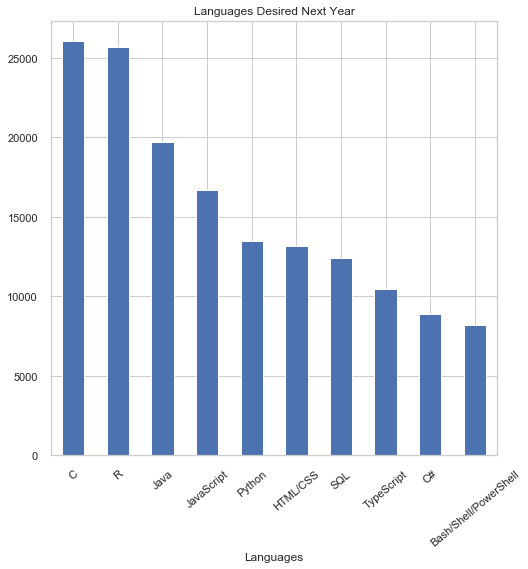

In [39]:
plt.figure(figsize = (8, 8))
LanguageDesireNextYear.sort_values(ascending = False)[:10].plot.bar()
plt.title('Languages Desired Next Year')
plt.xlabel('Languages')
plt.xticks(rotation = 40)
plt.show()

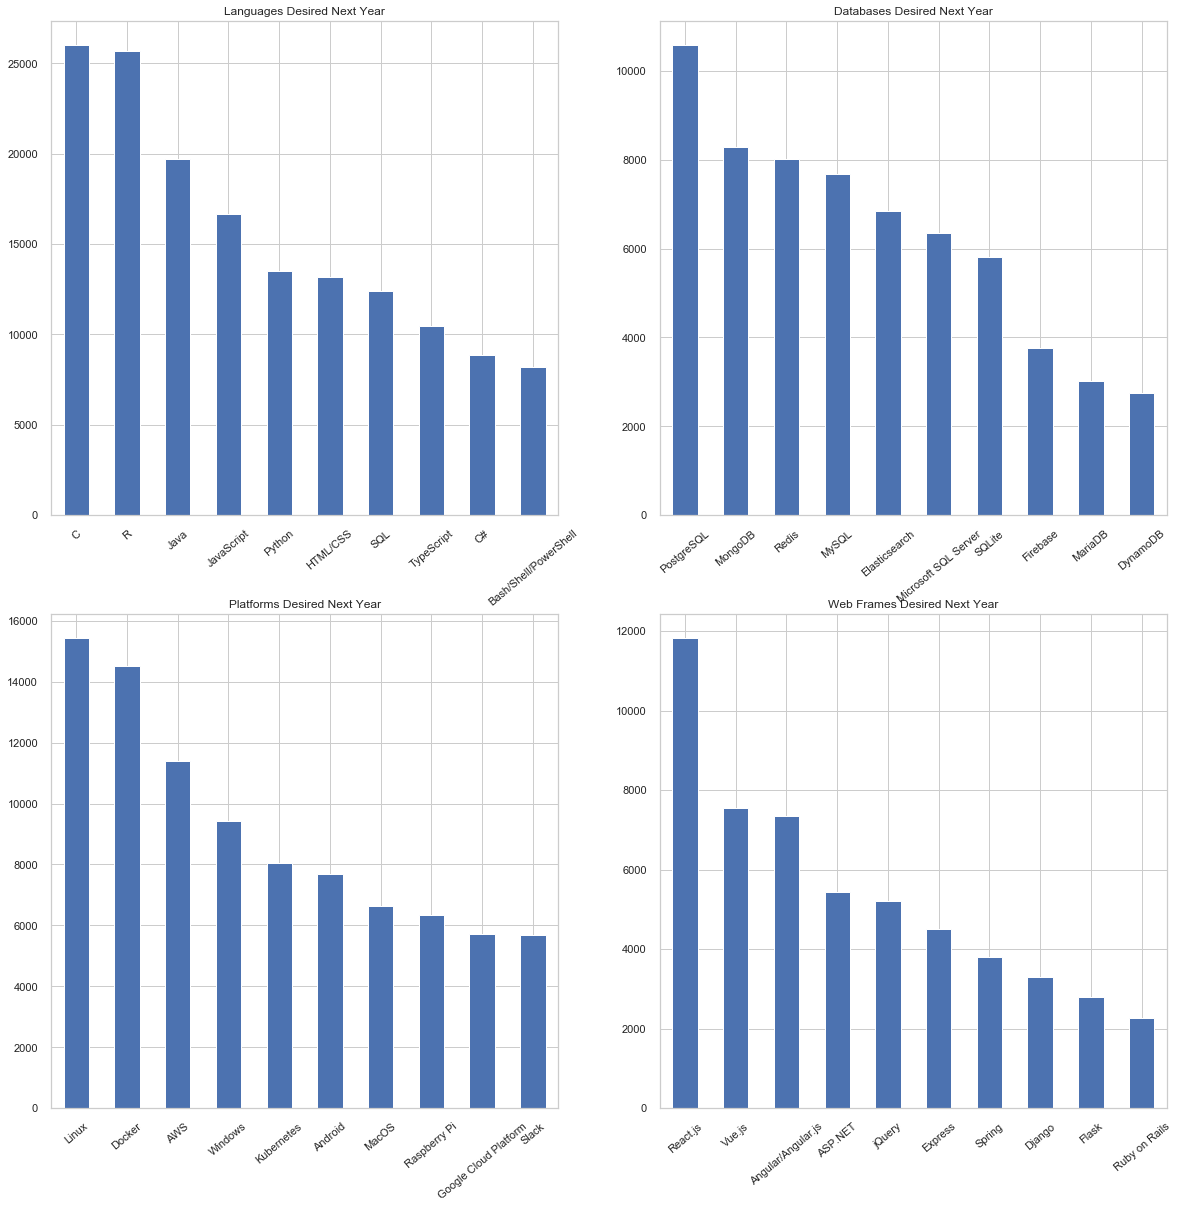

In [40]:
# plot with various axes scales
fig, axes = plt.subplots(figsize = (20, 20),nrows = 2, ncols = 2)

LanguageDesireNextYear.sort_values(ascending = False)[:10].plot(ax = axes[0, 0], kind = 'bar', 
                                                                title = 'Languages Desired Next Year')
DatabaseDesireNextYear.sort_values(ascending = False)[:10].plot(ax = axes[0, 1], kind = 'bar', 
                                                                title = 'Databases Desired Next Year')
PlatformDesireNextYear.sort_values(ascending = False)[:10].plot(ax = axes[1, 0], kind = 'bar', 
                                                                title = 'Platforms Desired Next Year')
WebFrameDesireNextYear.sort_values(ascending = False)[:10].plot(ax = axes[1, 1], kind = 'bar', 
                                                                title = 'Web Frames Desired Next Year')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 40)

plt.show()

## 5. Evaluate the Results

### From the data
1. Male developers outnumber female developers of all ages. So when we compare two genders based on the ratio within each gender, we can observe that the distribution of both sexes is similar in general. Also, about 63% of female developers have ages between 20 and 30, and about 54% for male developers, which results in lower average age in female developers.


2. When comparing the salary of two genders based on experience, we could see the increasing trend for male developers. However, it is hard to observe any pattern for female developers. In terms of education level, both genders show a similar trend in salary though female developers' compensation is lower for all levels of education degree.


3. In 2020, `C, R, Java, JavaScript, Python, HTML/CSS, SQL, TypeScript, C#, and Bach/Shell/PowerShell` are the top 10 languages desired to be used.


### Conclusion
  1. It is worth spending the extra time and resources on getting a bachelor’s degree. In terms of getting the highest compensation, focus on getting a doctoral degree. Ending up with a master’s degree may not be enough to meet your expectations.

  2. Focus on learning C, R, Java, JavaScript, and Python first if you want to outstand from your competitors.